In [1]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU available")
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU available") 

GPU available


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3                # RGB 

`Data Augmentation` **: Makes the model more robust and works best in real time scenarios.**

 ## os  
        :The 'os' module in Python provides a way of interacting with the operating system.   
        :Commonly used functions include os.listdir() to list files in a directory, os.path.join() to join paths, os.mkdir() to create directories, and os.remove() to delete files.

 ## cv2 (OpenCV) 
        : OpenCV (Open Source Computer Vision Library) is a popular open-source library for computer vision and image processing tasks
        : loading and saving images, image manipulation (resizing, cropping, rotating), feature detection and matching, object detection and tracking, and more.

 ## Augmentor
        : Augmentor is a Python library designed to perform data augmentation for images. It provides a simple and flexible way to generate augmented images for training machine learning models.
        :rotation, flipping, scaling, and shearing to images, as well as more advanced augmentations like adding noise, adjusting brightness/contrast, and applying filters.
        :used to increase the diversity of training data and improve the robustness and generalization of machine learning models.

## shutil
        :high-level interface for file operations. It offers functions for copying, moving, renaming, and deleting files and directories.
        :shutil.copy() to copy files, shutil.move() to move files, shutil.rmtree() to delete directories and their contents recursively, and shutil.make_archive() to create compressed archives.

## PIL (Python Imaging Library,Pillow library)
         : is a powerful library for opening, manipulating, and saving many different image file formats.
         : more advanced features like image enhancement, blending, and compositing.

 

In [3]:
import os
import cv2
import Augmentor
import shutil
from PIL import Image

In [8]:
import tensorflow as tf
print(tf.__version__)

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\\4-sem\\ICAR\\Soya_leaf_train\\test",
    shuffle = True,  
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

2.10.1
Found 770 files belonging to 7 classes.


In [9]:
total_class_in_dataset = list(dataset.class_names)
print(total_class_in_dataset)

['Bacterial Pustule', 'Frogeye Leaf Spot', 'Healty', 'Rust', 'Sudden Death Syndrome', 'Target Leaf Spot', 'Yellow Mosaic']


In [10]:
path_to_data = "D:\\4-sem\\ICAR\\Soya_leaf_train\\test"
aug_img = 1000

In [17]:
# This function fix the number of augmented images and handle RGB images
# Considering only RGB images for augmentation can help maintain consistency, compatibility, and quality in the dataset, especially when training deep learning models for computer vision tasks.

def aug_img():
    
    count = 0
    dir_path = path_of_foldd              
    dir_list = (os.listdir(dir_path))     # 'os.listdir()' function to get a list of all the filenames in the directory
    
    for mm in range(len(dir_list)):
        
        if dir_list[mm]=='output':
            pass
        else:
            file_path = (dir_path + dir_list[mm])
            
            img = Image.open(file_path,'r')
                
            if img.mode == 'RGB':
                count = count+1
            else:
                os.remove(file_path)
   
    print('file count:', count) 
    augmented_img = 1000-count
    
    if augmented_img > 0:
        augmented_img = augmented_img
    else:
        augmented_img = 0
    
    return augmented_img

## Sampling Augmented Images:

    The sample() method of the pipeline is called to generate augmented images. The parameter sp likely specifies the number of images to be generated during augmentation.



In [18]:
# This function augments the images and make the folders of equal size 

for m in range(len(total_class_in_dataset)):
    
    path_of_foldd = path_to_data + '/' + total_class_in_dataset[m] + '/'
    print(path_of_foldd)
    
    p = Augmentor.Pipeline(path_of_foldd)
    
    p.rotate(probability=0.9, max_left_rotation=10, max_right_rotation=10)   # rotation
    p.zoom(probability=0.4, min_factor=1.1, max_factor=1.6)                  # zoom
    
    sp = aug_img()
    p.sample(sp)  #how many images u want to augment

# probability parameter controls how often the operation is applied

D:\4-sem\ICAR\Soya_leaf_train\test/Bacterial Pustule/
Initialised with 110 image(s) found.
Output directory set to D:\4-sem\ICAR\Soya_leaf_train\test/Bacterial Pustule/output.file count: 110


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4608x3456 at 0x17A7EC82BC0>: 1


D:\4-sem\ICAR\Soya_leaf_train\test/Frogeye Leaf Spot/
Initialised with 110 image(s) found.
Output directory set to D:\4-sem\ICAR\Soya_leaf_train\test/Frogeye Leaf Spot/output.file count: 110


Processing <PIL.Image.Image image mode=RGB size=3456x4608 at 0x17A7BA5D150>: 100%|█| 890/890 [05


D:\4-sem\ICAR\Soya_leaf_train\test/Healty/
Initialised with 110 image(s) found.
Output directory set to D:\4-sem\ICAR\Soya_leaf_train\test/Healty/output.file count: 110


Processing <PIL.Image.Image image mode=RGB size=4160x3120 at 0x17A1A7E1A80>: 100%|█| 890/890 [04


D:\4-sem\ICAR\Soya_leaf_train\test/Rust/
Initialised with 110 image(s) found.
Output directory set to D:\4-sem\ICAR\Soya_leaf_train\test/Rust/output.file count: 110


Processing <PIL.Image.Image image mode=RGB size=4160x3120 at 0x17A4F9F6020>: 100%|█| 890/890 [07


D:\4-sem\ICAR\Soya_leaf_train\test/Sudden Death Syndrome/
Initialised with 110 image(s) found.
Output directory set to D:\4-sem\ICAR\Soya_leaf_train\test/Sudden Death Syndrome/output.file count: 110


Processing <PIL.Image.Image image mode=RGB size=4608x3456 at 0x17A41768190>: 100%|█| 890/890 [05


D:\4-sem\ICAR\Soya_leaf_train\test/Target Leaf Spot/
Initialised with 110 image(s) found.
Output directory set to D:\4-sem\ICAR\Soya_leaf_train\test/Target Leaf Spot/output.file count: 110


Processing <PIL.Image.Image image mode=RGB size=4000x3000 at 0x17A7BA5D300>: 100%|█| 890/890 [04


D:\4-sem\ICAR\Soya_leaf_train\test/Yellow Mosaic/
Initialised with 110 image(s) found.
Output directory set to D:\4-sem\ICAR\Soya_leaf_train\test/Yellow Mosaic/output.file count: 110


Processing <PIL.Image.Image image mode=RGB size=4160x3120 at 0x17A76B512D0>:  22%|▏| 194/890 [17


MemoryError: 

In [20]:
# Copy the files augmented from output folder to outside folder

for XD in range(len(total_class_in_dataset)):
    
    path_of_new_img = path_to_data + '/' + total_class_in_dataset[XD] + '/' + 'output' + '/'
    path_of_fold = path_to_data + '/' + total_class_in_dataset[XD] + '/'
    files = os.listdir(path_of_new_img)

     # iterating over all the files in the source directory
    for file_name in files:
       shutil.copy(path_of_new_img + file_name, path_of_fold + file_name)
    
    print("Files are copied successfully")

Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully
Files are copied successfully


In [22]:
for lol in range(len(total_class_in_dataset)):
    folder_path = path_to_data + '/' + total_class_in_dataset[lol] + '/' + 'output' + '/'                
    shutil.rmtree(folder_path)          
    
# removing the new dir that is created during data augmentation
print("Successfully removed output folder")
print("Data Augmentation Completed")

Successfully removed output folder
Data Augmentation Completed


**`Load the Dataset`**

**`tf.keras.preprocessing.image_dataset_from_directory -` 
It loads images in batches, which helps in avoiding memory overflow issues, especially when dealing with large datasets that may not fit entirely into memory.**

In [23]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\\4-sem\\ICAR\\Soya_leaf_train\\test",
    shuffle = True,  
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6462 files belonging to 7 classes.


In [24]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\\4-sem\\ICAR\\Soya_leaf_train\\test1",
    shuffle = True,  
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 770 files belonging to 7 classes.


In [25]:
class_names = train_data.class_names
class_names

['Bacterial Pustule',
 'Frogeye Leaf Spot',
 'Healty',
 'Rust',
 'Sudden Death Syndrome',
 'Target Leaf Spot',
 'Yellow Mosaic']

In [26]:
print("Tensor Object")
train_data.take(1) 

Tensor Object


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
# The size of one tensor for one image is 256 x 256 x 3 = 196608 floating-point values.
# The values in the tensor represent the pixel intensities of each color channel for each pixel in each image. 
# These values are typically normalized to the range [0, 1] or [0, 255] depending on the preprocessing applied to the images. 
# Each value represents the intensity of the corresponding color channel at a specific pixel location in the image.
# In label_batch, the labels could range from 0 to 6, each representing a different individual class.

for image_batch,label_batch in train_data.take(1):       # taking 1st batch
    print("\n 32 images in one Batch: " )  
    print("\n", image_batch)  
    print("\n Single Image size: (Height*Breadth*RGB) - ", image_batch[0].shape) # Size of tensor for single image
    print("\n Batch Size: ", image_batch.shape)
    print("\n Labels of one batch 32 images 32 labels")      
    print("\n", label_batch) 


 32 images in one Batch: 

 tf.Tensor(
[[[[ 95.25      86.25      91.25    ]
   [ 87.375     71.625     77.      ]
   [ 89.5       79.5       78.5     ]
   ...
   [ 66.125    138.125    126.125   ]
   [ 75.125    134.375    124.5     ]
   [104.125    114.5      110.875   ]]

  [[ 90.375     79.375     85.375   ]
   [ 95.375     80.375     87.375   ]
   [ 79.125     68.125     74.125   ]
   ...
   [ 73.5      140.5      133.5     ]
   [ 64.75     130.75     118.75    ]
   [107.75     120.75     116.375   ]]

  [[ 88.125     73.125     80.125   ]
   [ 93.        78.        85.      ]
   [ 77.875     66.875     74.875   ]
   ...
   [ 69.875    138.       128.25    ]
   [ 75.125    138.125    127.125   ]
   [ 97.625    134.625    124.125   ]]

  ...

  [[ 66.5       59.5       51.5     ]
   [ 68.125     57.625     51.375   ]
   [ 53.875     49.875     40.875   ]
   ...
   [167.125    161.5      124.75    ]
   [152.25     158.25     143.75    ]
   [137.375    127.875    110.875   ]]

  [[ 

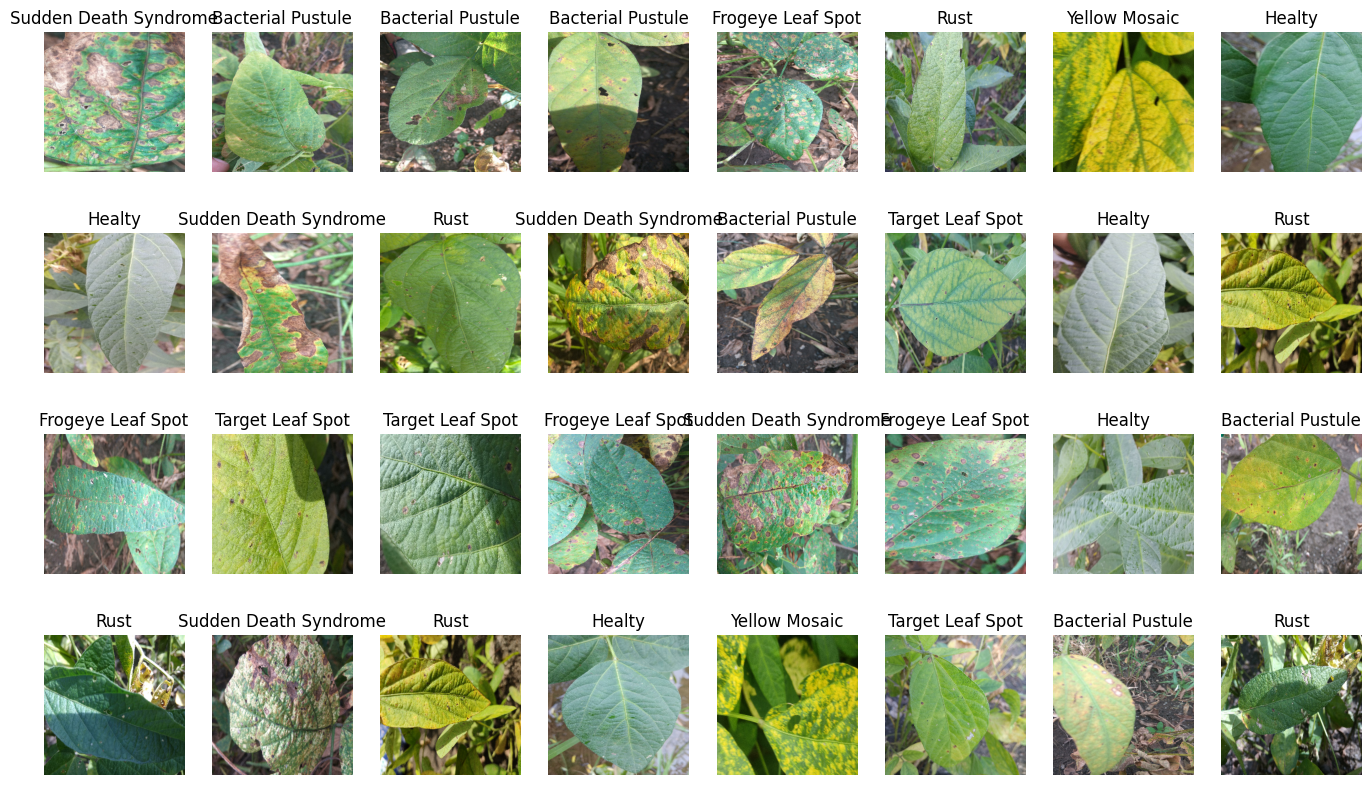

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,10))

for image_batch, label_batch in train_data.take(1):
    
    for i in range(image_batch.shape[0]):
        
        ax = plt.subplot(4,8,i+1)   # 4 rows, 8 columns
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

**Cross Validation - Divide the dataset**
```
* Train = 80%
* Test = 10%
* Validation = 10%
```
**The `shuffle_size` refers to the number of times the data is shuffled before partitioning it into training and validation sets. Each shuffle creates a different arrangement of the data, which affects how the data is split and distributed**

In [29]:
def get_dataset_partition_tf( ds, test_split=0.1, val_split=0.1, shuffle=True, shuffle_size=10000):

  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle( shuffle_size, seed=12 )

  val_size = int( val_split * ds_size )

  val_ds = ds.skip( val_size )
  test_ds = ds.skip( val_size )

  return test_ds, val_ds

In [30]:
test_ds, val_ds = get_dataset_partition_tf( test_data, test_split = 0.5, val_split = 0.5 )

print( "Training Batches :", len(train_data) )
print( "Testing Batches :", len(test_ds) )
print( "validation Batches :", len(val_ds) )

Training Batches : 202
Testing Batches : 13
validation Batches : 13


**Improve the performance of training and Data Pipeline**

**1. `.prefetch(AUTOTUNE)` : While GPU is processing batch1, the CPU will prefetch the batch2. Which results proper utilisation of hardwares and we save time in training. AUOTUNE, Let's the tf library decide how many it wants to prefetch.**

**2. `ds.cache()` : Do not perform the redundant steps at every epoch. All the following steps takes a lot of time in reloading at every epoch.**
* **Open and read the dataset**
* **Extract the label from folders**
* **Convert the images to numpy array**
* **Scale the pixels to 0 and 1**
* **Rescaling the pixels**
* **Prefetch the batches**

In [31]:
train_ds = train_data.cache().shuffle(1000).prefetch( buffer_size = tf.data.AUTOTUNE )
test_ds = test_ds.cache().shuffle(1000).prefetch( buffer_size = tf.data.AUTOTUNE )
val_ds = val_ds.cache().shuffle(1000).prefetch( buffer_size = tf.data.AUTOTUNE )

**Data Preprocessing**

**`Rescaling and Resizing` : Resize every image pixel to 256. Divide the pixel by 255 which gives the value between 0 to 1.**

In [32]:
from tensorflow.keras import models, layers, applications

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing( IMAGE_SIZE, IMAGE_SIZE ),
    layers.experimental.preprocessing.Rescaling( 1.0/255 )
])

**`Why layers.experimental.preprocessing not ImageDataGenerator?`**

* **`ImageDataGenerator` is well-suited for scenarios where you have a large dataset stored on disk and want to perform on-the-fly data augmentation during model training.**

* **The augmentation operations in `layers.experimental.preprocessing` are implemented as layers in the model, making it easy to integrate them directly into your model architecture and as part of your model's graph, enabling you to save the augmented model as a single entity.**

In [33]:
# We are not using this, since we already have the data augmented present in out local machine

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
])

**`Build the Model` : Using Convolutional Neural Network for Image Classfication**

In [34]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 7

model = models.Sequential([
    
    resize_and_rescale,
    # data_augmentation,
    
    layers.Conv2D(32,(4,4),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(4,4),activation='relu',input_shape = input_shape),        
    layers.MaxPooling2D((2,2)), 
    
    layers.Conv2D(64,(4,4),activation='relu'),             
    layers.MaxPooling2D((2,2)),  
    
    layers.Conv2D(64,(4,4),activation='relu'),            
    layers.MaxPooling2D((2,2)),  
    
    layers.Conv2D(64,(4,4),activation='relu'),                  
    layers.MaxPooling2D((2,2)),                         
    # the value in Convo2D and MaxPolling is fully based on hit and trail approach

    layers.Flatten(),
    
    # prediction is a dense layer with 9 categories and activation function as softmax
    # If we are having 2 objects at output, we can use sigmoid
    # We are having multiple objects at output, hence we are using softmax
    
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 126, 126, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 123, 123, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 61, 61, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 58, 58, 64)         

In [35]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

**`Use Pre-trained Model` : Resnet50 trained on Imagenet dataset.**

In [ ]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 7

# Load pre-trained ResNet50 model (without top classification layers)
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers
base_model.trainable = False

# Create a new model by adding custom classification layers on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
)
model_checkpoint = ModelCheckpoint(
    filepath="./model_weights.h5",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1,
)
model_callbacks = [early_stopping, model_checkpoint]

**`tf.config.list_physical_devices('GPU') -` Ensures GPU Availability**

In [ ]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU available")
else:
    print("No GPU available")

In [37]:
history = model.fit(
    train_ds,
    epochs = 100,
    batch_size= BATCH_SIZE,
    verbose =1,
    validation_data=val_ds,
    callbacks=model_callbacks,
)

Epoch 1/100
202/202 [==============================] - ETA: 0s - loss: 1.5700 - accuracy: 0.3598
Epoch 1: val_loss improved from inf to 1.27511, saving model to .\model_weights.h5
202/202 [==============================] - 250s 505ms/step - loss: 1.5700 - accuracy: 0.3598 - val_loss: 1.2751 - val_accuracy: 0.5216
Epoch 2/100
202/202 [==============================] - ETA: 0s - loss: 1.1279 - accuracy: 0.5699
Epoch 2: val_loss improved from 1.27511 to 0.99185, saving model to .\model_weights.h5
202/202 [==============================] - 62s 305ms/step - loss: 1.1279 - accuracy: 0.5699 - val_loss: 0.9918 - val_accuracy: 0.6442
Epoch 3/100
202/202 [==============================] - ETA: 0s - loss: 0.8993 - accuracy: 0.6605
Epoch 3: val_loss improved from 0.99185 to 0.62634, saving model to .\model_weights.h5
202/202 [==============================] - 59s 290ms/step - loss: 0.8993 - accuracy: 0.6605 - val_loss: 0.6263 - val_accuracy: 0.7524
Epoch 4/100
202/202 [============================

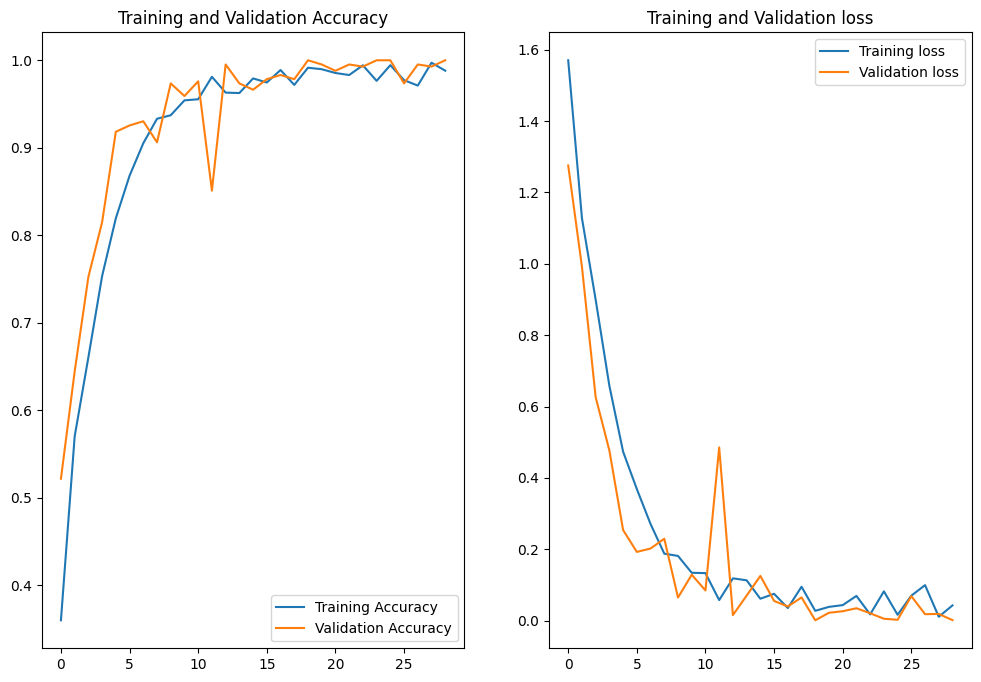

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 29

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")


# plot loss  and val_loss accuracy

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')              # means jo apn indication box hai woh right upper mei aayga
plt.title("Training and Validation loss")
plt.show()

In [40]:
# Testing
score = model.evaluate(test_ds)

13/13 [==============================] - 28s 57ms/step - loss: 0.0026 - accuracy: 1.0000


In [41]:
score

[0.002583489753305912, 1.0]

In [42]:
# about history
history.params

{'verbose': 1, 'epochs': 100, 'steps': 202}

In [43]:
def pesticidee(img_name):
    if img_name=='Field Cricket':
        return('Talstar PL granular')
    elif img_name=='Jute Stem Weevil':
        return('Spray 2.5kg of carbaryl 50 WP in 625 L of water per ha ')
    elif img_name=='Spilosoma Obliqua':
        return('cypermethrin')
    elif img_name=='Yellow Mite':
        return('Buprofezin 25% SC')
    elif img_name=='aphids':
        return('Insecticidal soaps and oils')
    elif img_name=='armyworm ':
        return('Chlorantraniliprole, emamectin benzoate, and spinetoram')
    elif img_name=='beetle':
        return('Chlorpyrifos')
    elif img_name=='bollworm':
        return('Spray pyrethroids 100 days after sowing for this pest')
    elif img_name=='grasshopper':
        return('Malathion, carbaryl and permethrin')
    elif img_name=='mites':
        return('Azobenzene, dicofol, ovex, and tetradifon')
    elif img_name=='mosquito':
        return('organophosphate insecticides malathion')
    elif img_name=='sawfly':
        return('Permethrin, bifenthrin, lambda cyhalothrin and carbaryl')
    elif img_name=='stem borer':
        return('furadan applicatio')

In [46]:
import numpy as np

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())   #convert image into array
    img_array = tf.expand_dims(img_array, 0)                  # creat a batch

    predictions = model.predict(img_array)
    print(predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    
    confidence = round(100 * (np.max(predictions[0])), 2)
   #  Pesticidee = pesticidee(predicted_class)
    return predicted_class, confidence

1/1 [==============================] - 1s 841ms/step
[[2.0955952e-07 1.4723471e-11 9.3762366e-14 9.9999976e-01 5.5767169e-09
  2.0457800e-13 1.5986178e-14]]
1/1 [==============================] - 0s 20ms/step
[[9.7179702e-07 5.7968700e-05 1.8011132e-13 3.1192861e-11 9.9994111e-01
  8.8872437e-10 8.8550987e-13]]
1/1 [==============================] - 0s 30ms/step
[[5.4170323e-05 1.3885644e-07 2.1676384e-07 5.8147316e-03 1.0780679e-08
  1.1573474e-06 9.9412954e-01]]
1/1 [==============================] - 0s 30ms/step
[[2.7584670e-15 1.3531869e-17 7.9112128e-19 8.1770289e-13 5.8146810e-18
  1.0000000e+00 6.2634772e-12]]
1/1 [==============================] - 0s 30ms/step
[[7.6268686e-10 1.2527075e-11 2.4653134e-14 9.9999762e-01 3.1672055e-13
  2.4318726e-06 9.8198901e-15]]
1/1 [==============================] - 0s 20ms/step
[[8.0531078e-18 9.8152226e-17 1.1491463e-22 1.6343900e-12 1.2663547e-20
  8.1073174e-20 1.0000000e+00]]
1/1 [==============================] - 0s 30ms/step
[[9.9999487

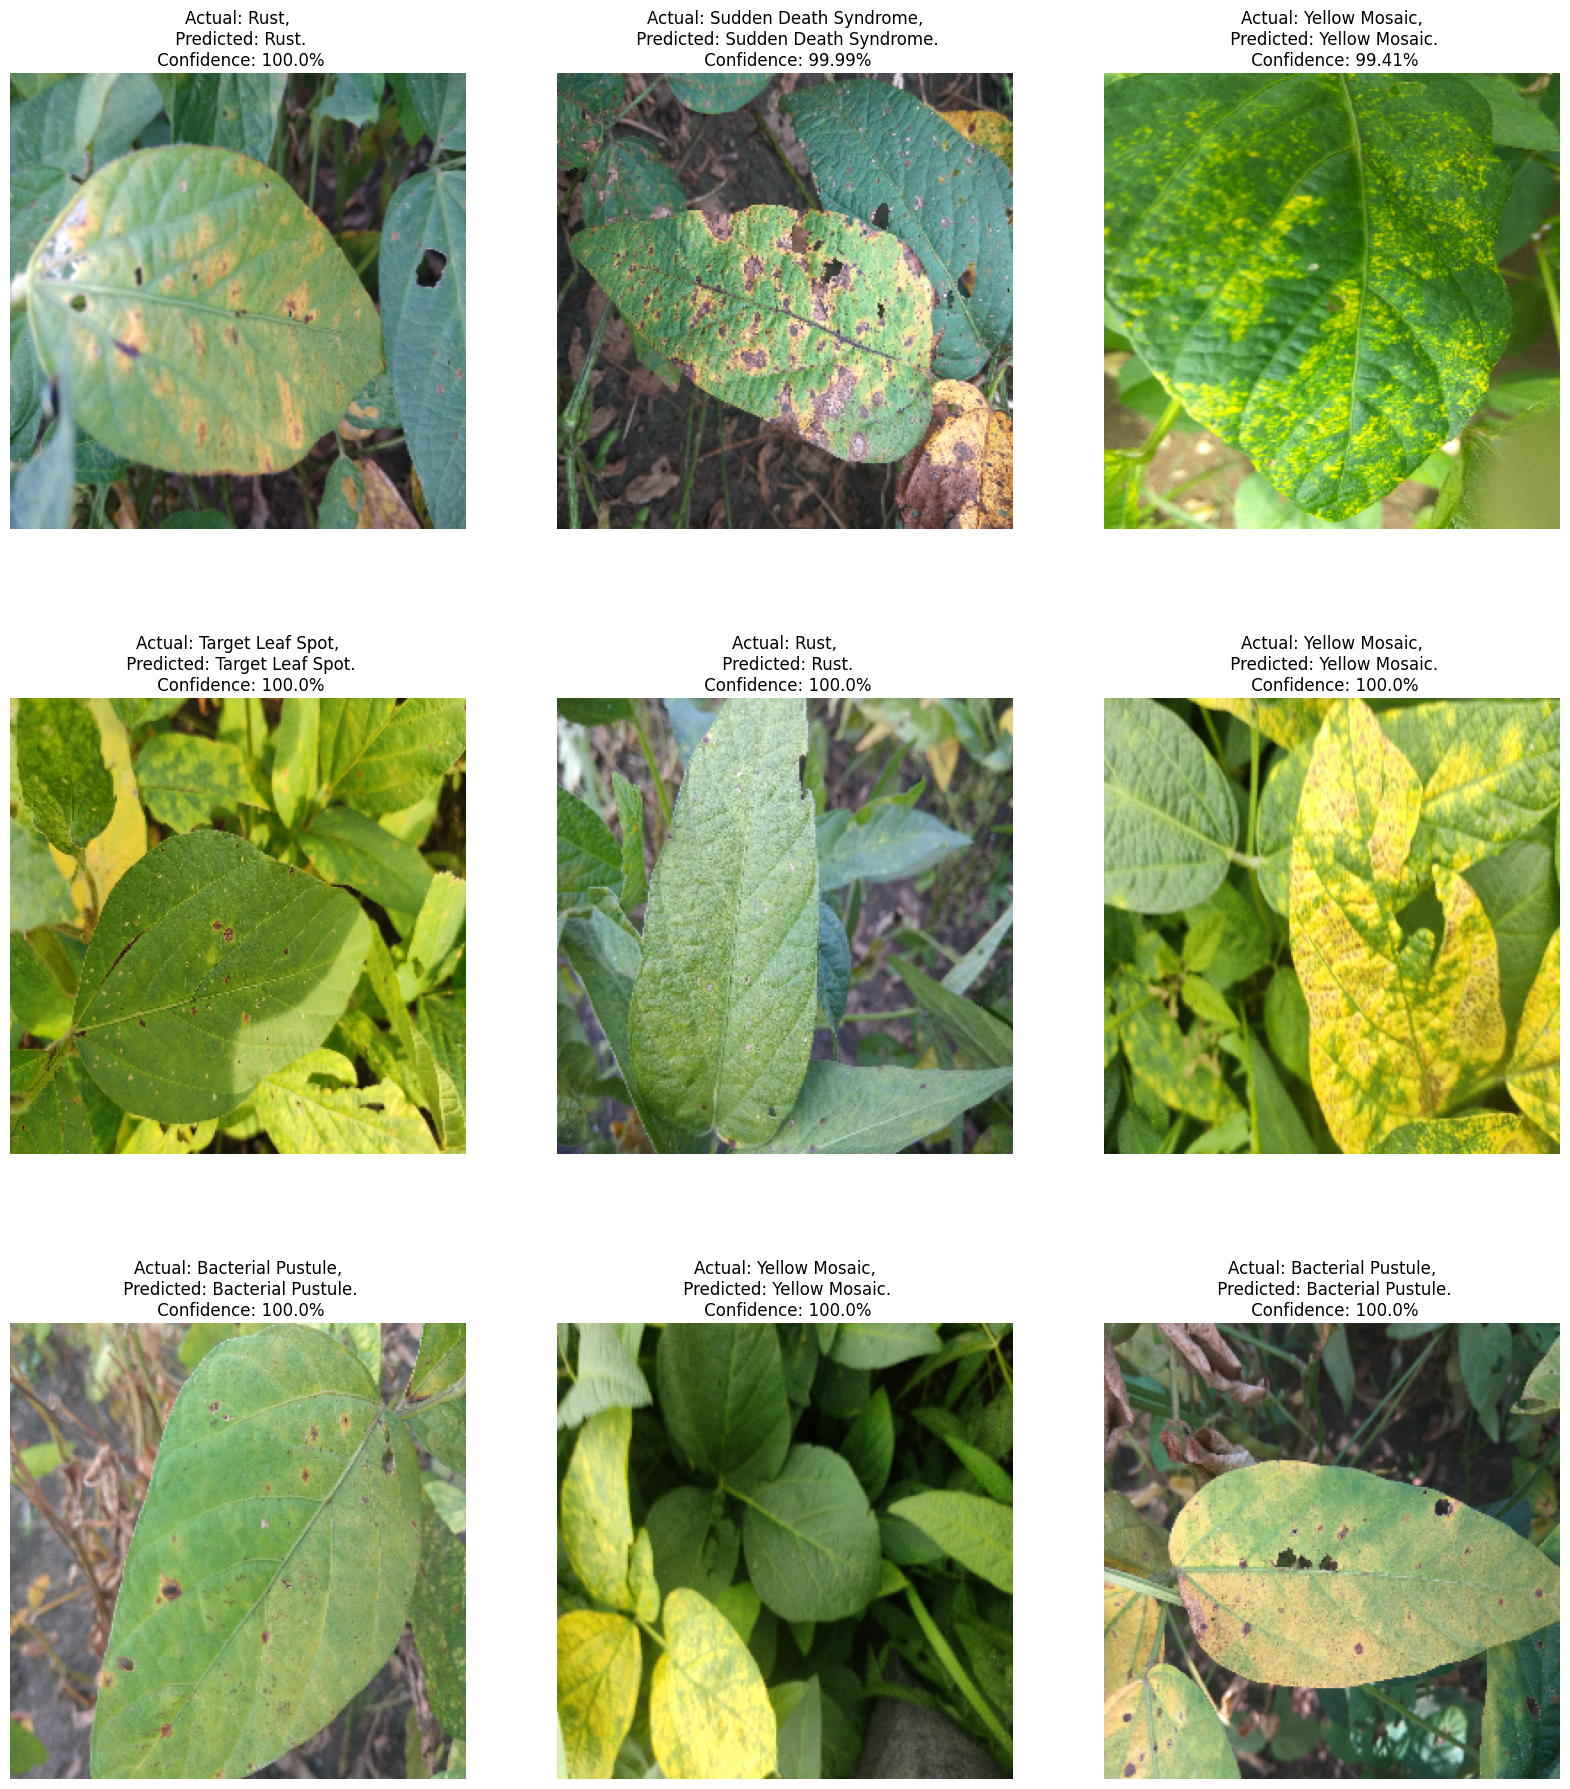

In [45]:
plt.figure(figsize=(20,23))

for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence  = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [56]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [58]:
# from sklearn.metrics import confusion_matrix , classification_report
# import numpy as np
# y_pred = ann.predict(test_ds)
# y_pred_classes = [np.argmax(element) for element in y_pred]

# print("Classification Report: \n", classification_report(test_ds, y_pred_classes))

In [48]:
from keras.models import load_model
m1 = load_model("model_weights.h5")

In [54]:
import cv2
import numpy as np

# Load the image from file
image_path = r"D:\4-sem\ICAR\Soya_leaf_train\test\Rust(1).jpg"
image = cv2.imread(image_path)

# Check if image loading was successful
if image is None:
    print(f"Error: Failed to load image from '{image_path}'")
else:
    # Preprocess the image (resize, normalize, etc.)
    # Example: Resize image to match input size expected by the model
    width, height = 255, 255  # Example input size for illustration
    image = cv2.resize(image, (width, height))  # Resize the image

    # Convert image to NumPy array and normalize pixel values
    input_image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]

    # Expand dimensions if needed (e.g., for models expecting batch input)
    input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

    # Perform prediction using the model
    prediction = model.predict(input_image)

    # Use the prediction for further processing
    print(prediction)


Error: Failed to load image from 'D:\4-sem\ICAR\Soya_leaf_train\test\Rust(1).jpg'
